In [3]:
# 必要なライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 1. データの準備
x = np.array([18, 39, 34, 43, 44, 46, 48, 15]) # 価格
y = np.array([82, 87, 94, 92, 86, 94, 81, 79]) # 評価
titles = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

# 2. 基本統計量の計算
n = len(x)
x_mean = np.mean(x)
y_mean = np.mean(y)

# 3. 偏差、偏差の二乗、偏差の積の計算（途中経過用）
x_diff = x - x_mean              # xの偏差 (x - x_bar)
y_diff = y - y_mean              # yの偏差 (y - y_bar)
x_diff_sq = x_diff**2            # xの偏差平方 (x - x_bar)^2
xy_diff = x_diff * y_diff        # 偏差の積 (x - x_bar)(y - y_bar)

# 4. 合計値の計算
sum_x_diff_sq = np.sum(x_diff_sq) # xの偏差平方和 (分母)
sum_xy_diff = np.sum(xy_diff)     # 偏差共分散 (分子)

# 5. 回帰係数の算出
beta_1_hat = sum_xy_diff / sum_x_diff_sq
beta_0_hat = y_mean - (beta_1_hat * x_mean)

y_hat = beta_1_hat * x + beta_0_hat

# --- 全ての値を計算して表示 ---
print("=== 1. 基本データと偏差の計算 ===")
df_calc = pd.DataFrame({
    'Title': titles,
    'x (Price)': x,
    'y (Rating)': y,
    'x-x_mean': x_diff,
    'y-y_mean': y_diff,
    '(x-x_mean)^2': x_diff_sq,
    '(x-x_mean)(y-y_mean)': xy_diff
})
print(df_calc.to_string(index=False))

print("\n=== 2. 合計と平均 ===")
print(f"データ数 (n): {n}")
print(f"価格の平均 (x_mean): {x_mean:.4f}")
print(f"評価の平均 (y_mean): {y_mean:.4f}")
print(f"xの偏差平方和 (分母): {sum_x_diff_sq:.4f}")
print(f"xとyの偏差積和 (分子): {sum_xy_diff:.4f}")

print("\n=== 3. 回帰係数の推定結果 ===")
print(f"切片 (beta_0_hat): {beta_0_hat:.4f}")

print("\n=== 4. 最終的な回帰式 ===")
print(f"y_hat = {beta_1_hat:.4f} * x + {beta_0_hat:.4f}")

print(df_res.to_string(index=False))

=== 1. 基本データと偏差の計算 ===
Title  x (Price)  y (Rating)  x-x_mean  y-y_mean  (x-x_mean)^2  (x-x_mean)(y-y_mean)
    A         18          82   -17.875    -4.875    319.515625             87.140625
    B         39          87     3.125     0.125      9.765625              0.390625
    C         34          94    -1.875     7.125      3.515625            -13.359375
    D         43          92     7.125     5.125     50.765625             36.515625
    E         44          86     8.125    -0.875     66.015625             -7.109375
    F         46          94    10.125     7.125    102.515625             72.140625
    G         48          81    12.125    -5.875    147.015625            -71.234375
    H         15          79   -20.875    -7.875    435.765625            164.390625

=== 2. 合計と平均 ===
データ数 (n): 8
価格の平均 (x_mean): 35.8750
評価の平均 (y_mean): 86.8750
xの偏差平方和 (分母): 1134.8750
xとyの偏差積和 (分子): 268.8750

=== 3. 回帰係数の推定結果 ===
傾き (beta_1_hat): 0.2369
切片 (beta_0_hat): 78.3755

=== 4. 最終的な回帰式

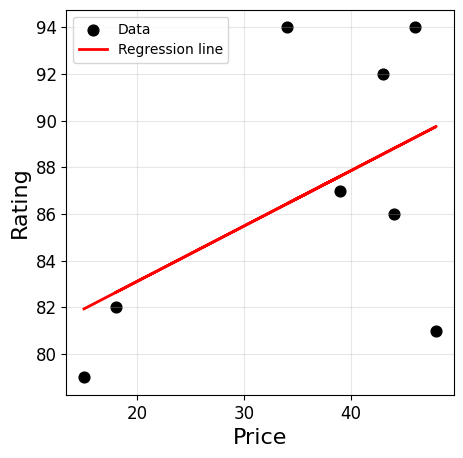

In [20]:
plt.figure(figsize=(5, 5))
plt.scatter(x, y, color='k', s=60, label='Data')
# 回帰直線を描画（xをソートして線を引く）
sorted_idx = np.argsort(x)
plt.plot(x, y_hat, color='red', linewidth=2, label='Regression line')
plt.xlabel('Price', fontsize=16)
plt.ylabel('Rating', fontsize=16)
plt.legend()
plt.tick_params(labelsize=12)
plt.grid(alpha=0.3)
plt.savefig('regression_plot.png')
plt.show()

